<a href="https://www.kaggle.com/code/mrsimple07/penguins-size-eda-prediction?scriptVersionId=196602332" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguin-size-dataset/penguins_size.csv


# Exploring Penguin Characteristics: A Data Analysis Journey 🐧

Welcome to this data analysis exploration where we delve into the fascinating world of penguins! In this notebook, we'll be analyzing a dataset that includes various characteristics of different penguin species, such as culmen length, culmen depth, flipper length, body mass, and more.

## Introduction

Penguins are known for their unique features and behaviors, and this dataset provides a glimpse into the diverse attributes of different penguin species. Let's embark on a journey of discovery as we visualize and analyze the data to unveil interesting patterns and insights.

In [2]:
import pandas as pd
df=  pd.read_csv('/kaggle/input/penguin-size-dataset/penguins_size.csv')

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis (EDA)
As we can see we have missing values. Let's first handle this:


In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

We will drop the missing values

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

And now we don't have any missing values

**Let's visualize some data:**

**1. Correlation between numerical values**

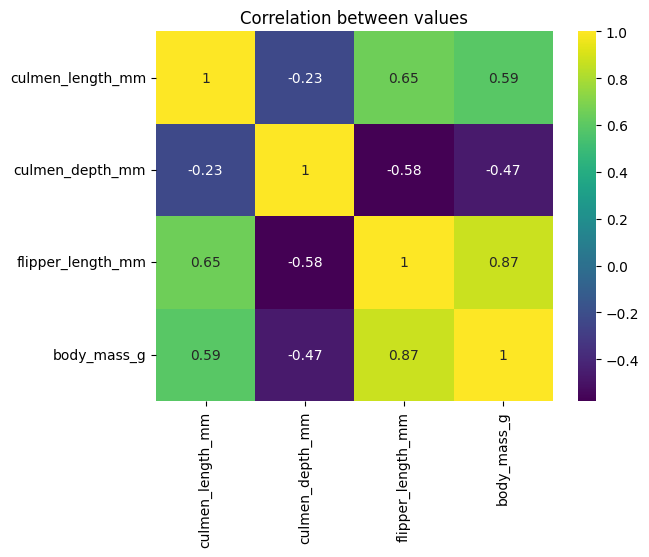

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

sns.heatmap(df[corr_matrix].corr(), annot = True, cmap = 'viridis')
plt.title('Correlation between values')
plt.show()

**2. What is the number of types of penguins**

In [7]:
num_penguins = df['species'].value_counts()
num_penguins

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

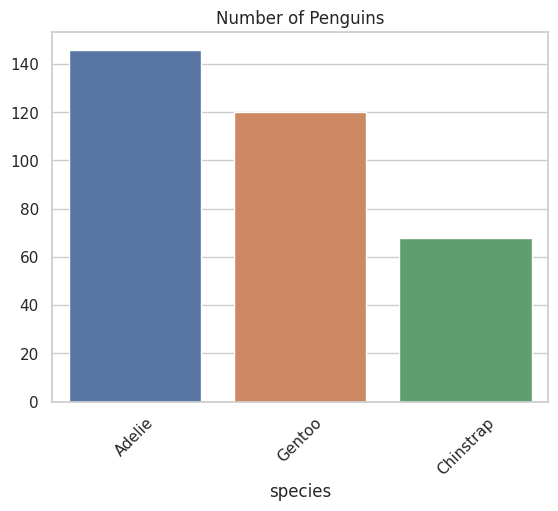

In [8]:
sns.set(style= 'whitegrid')
sns.barplot(x= num_penguins.index, y = num_penguins.values)
plt.title('Number of Penguins')
plt.xticks(rotation = 45)
plt.show()

**3. Where the most they live**

In [9]:
num_location = df['island'].value_counts()
num_location

island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

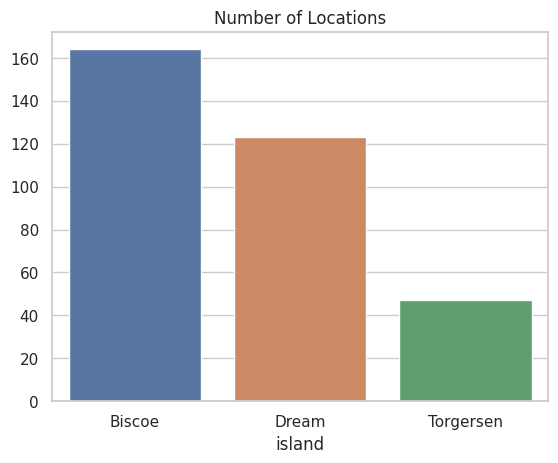

In [10]:
sns.barplot(x = num_location.index, y = num_location.values)
plt.title('Number of Locations')
plt.show()

**4. Male/Female distribution**

In [11]:
penguins = df['sex'].value_counts()
penguins

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

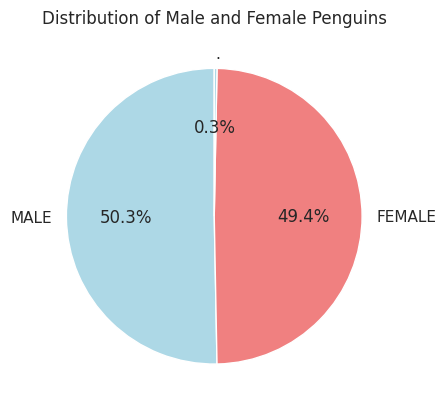

In [12]:
plt.pie(penguins, labels=penguins.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Male and Female Penguins')
plt.show()

**5. Histogram of flipper lengths with bins to show the frequency distribution.**

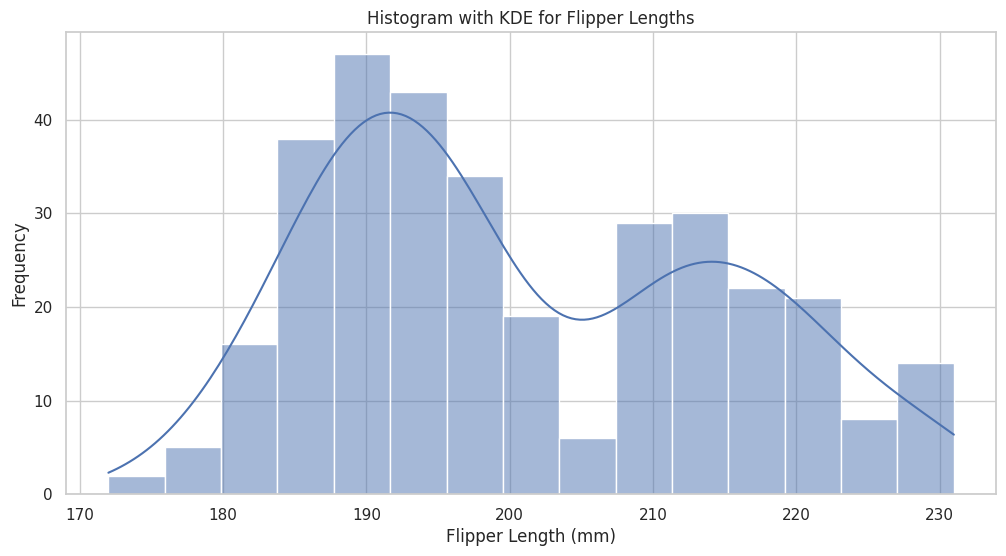

In [13]:
plt.figure(figsize = (12,6))
sns.histplot(df['flipper_length_mm'], bins = 15, kde = True)
plt.title('Histogram with KDE for Flipper Lengths')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

**6. Histogram of culmen depth with bins to show the frequency distribution.**


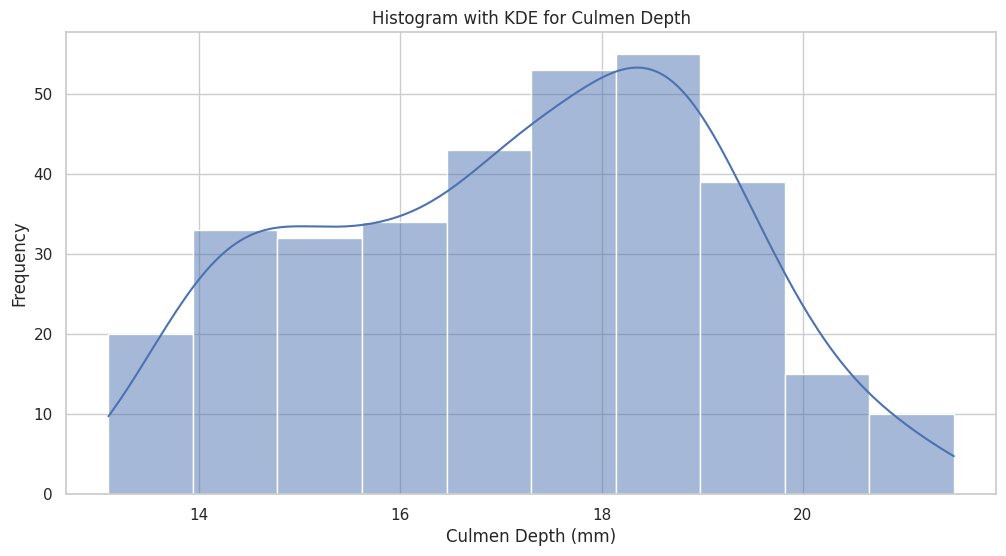

In [14]:
plt.figure(figsize = (12,6))
sns.histplot(df['culmen_depth_mm'], kde = True)
plt.title('Histogram with KDE for Culmen Depth')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Frequency')
plt.show()

**7. Box Plots for Numerical Features**

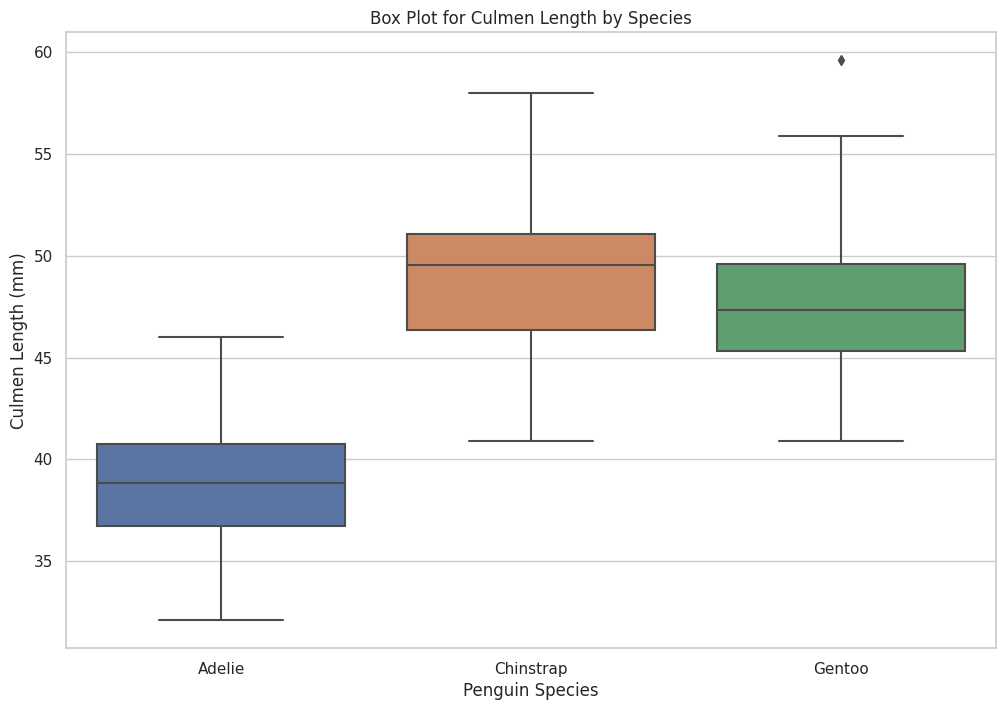

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='culmen_length_mm', data=df)
plt.title('Box Plot for Culmen Length by Species')
plt.xlabel('Penguin Species')
plt.ylabel('Culmen Length (mm)')
plt.show()

**8. Violinplots to visualize the distribution of features across species**

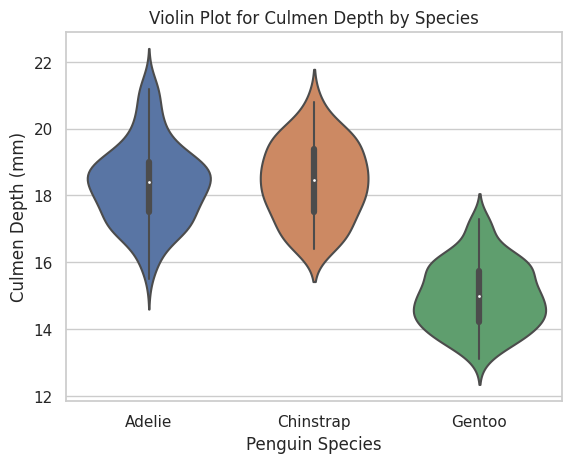

In [16]:
sns.violinplot(data = df, x = 'species', y = 'culmen_depth_mm')
plt.title('Violin Plot for Culmen Depth by Species')
plt.xlabel('Penguin Species')
plt.ylabel('Culmen Depth (mm)')
plt.show()

**9. Swarm Plots for Individual Data Points**

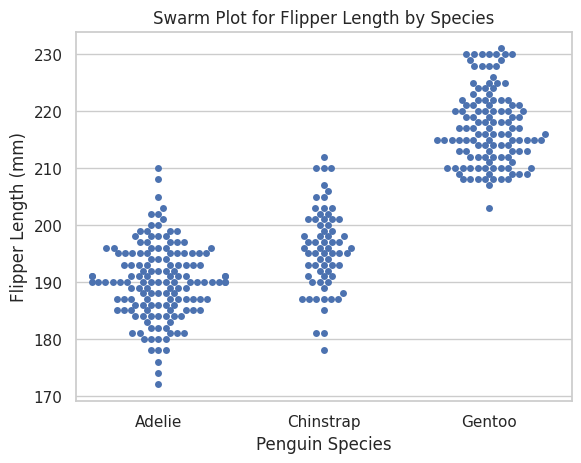

In [17]:
sns.swarmplot(x = 'species', y= 'flipper_length_mm', data =df)
plt.title('Swarm Plot for Flipper Length by Species')
plt.xlabel('Penguin Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

# Machine Learning Modeling for Predicting Penguin Sex 🤖🐧

In this section, we'll dive into the exciting world of machine learning to predict the sex of penguins based on their distinctive features. Let's follow a step-by-step process, starting from data preparation to training and evaluating a machine learning model.


We use the Random Forest Classifier for this data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8656716417910447
              precision    recall  f1-score   support

      FEMALE       0.89      0.86      0.88        37
        MALE       0.84      0.87      0.85        30

    accuracy                           0.87        67
   macro avg       0.86      0.87      0.86        67
weighted avg       0.87      0.87      0.87        67



Cross validation with Decision Tree

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings 

warnings.filterwarnings('ignore')

dt = DecisionTreeClassifier()

cv_scores = cross_val_score(dt, X,y, cv =5, scoring = 'accuracy')
print(cv_scores)
print('Accuracy: ', cv_scores.mean())

[0.70149254 0.80597015 0.79104478 0.89552239 0.89393939]
Accuracy:  0.8175938489371324


Feel free to join me on this exciting journey of penguin exploration! Let's dive into the code and visualize the wonders hidden in our data.

Happy coding! 🐧✨

**If you like it and find it useful, please upvote this notebook! 🚀**